In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import sigkernel as ksig

In [2]:
num_permutations = 200
n_levels = 4
n_samples = 100
sample_len = 60
dt = 1/252
difference = True

static_kernel = ksig.static.kernels.LinearKernel()
sig_kernel = ksig.kernels.SignatureKernel(n_levels, order=n_levels, static_kernel=static_kernel, difference=difference)
kernel = lambda X,Y : sig_kernel(X, Y)
mmd = lambda X,Y : ksig.tests.quadratic_time_mmd(X, Y, kernel)

In [3]:
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len)
Y = ksig.tests.gen_GBM_path(0.1, 0.3, dt, n_samples, sample_len)

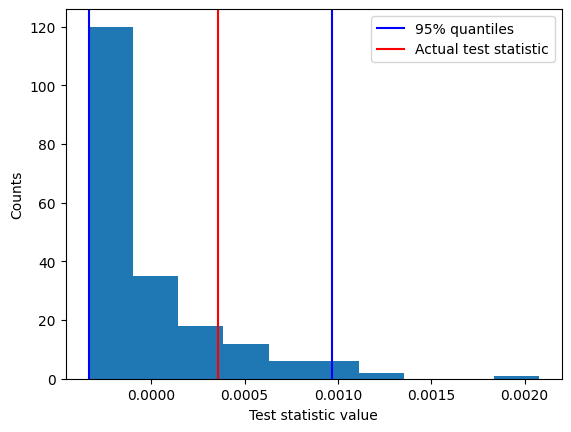

In [4]:
stats_dist = ksig.tests.two_sample_permutation_test(mmd, X, Y, num_permutations)
stats = mmd(X,Y)
ksig.tests.plot_permutation_samples(stats_dist, stats)

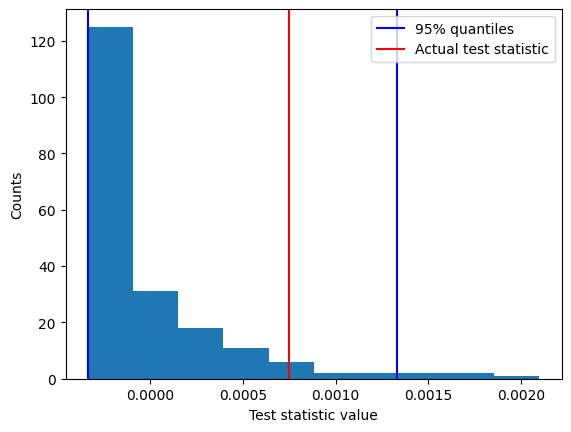

In [9]:
stats_dist = ksig.tests.two_sample_permutation_test(mmd, np.log(X), np.log(Y), num_permutations)
stats = mmd(np.log(X), np.log(Y))
ksig.tests.plot_permutation_samples(stats_dist, stats)

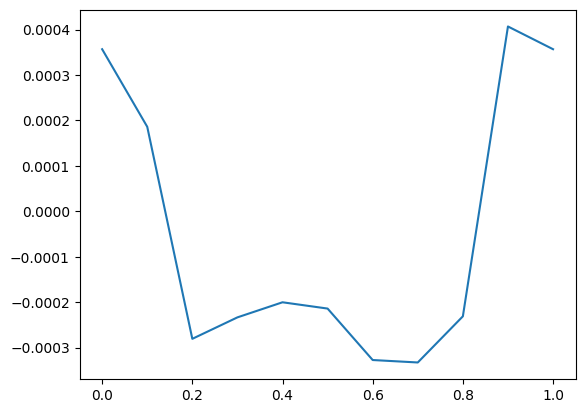

In [5]:
distribution = np.empty((2, 11))
for i in range(11):
    split = i / 10
    index = int(split * n_samples)

    X_ = np.concatenate([X[:index], Y[index:]])
    Y_ = np.concatenate([Y[:index], X[index:]])

    stats = mmd(X_, Y_)
    distribution[0, i] = split
    distribution[1, i] = stats
plt.plot(distribution[0], distribution[1])

In [6]:
sig_kernel(X, X)

array([[1.00005347, 0.99849472, 0.99959088, ..., 1.00059176, 1.0002197 ,
        0.9999818 ],
       [0.99849472, 1.04286223, 1.01155669, ..., 0.98340559, 0.99382228,
        1.00051279],
       [0.99959088, 1.01155669, 1.00313352, ..., 0.99547739, 0.99831954,
        1.00013932],
       ...,
       [1.00059176, 0.98340559, 0.99547739, ..., 1.00655814, 1.00243256,
        0.99979855],
       [1.0002197 , 0.99382228, 0.99831954, ..., 1.00243256, 1.00090287,
        0.9999252 ],
       [0.9999818 , 1.00051279, 1.00013932, ..., 0.99979855, 0.9999252 ,
        1.0000062 ]])

In [7]:
sig_kernel(Y, Y)

array([[1.00032726, 0.99843815, 1.00106821, ..., 1.00057167, 0.99907047,
        1.00305617],
       [0.99843815, 1.00747432, 0.99490742, ..., 0.99727268, 1.00444427,
        0.98547174],
       [1.00106821, 0.99490742, 1.00348818, ..., 1.00186623, 0.99696808,
        1.009991  ],
       ...,
       [1.00057167, 0.99727268, 1.00186623, ..., 1.00099865, 0.99837665,
        1.0053413 ],
       [0.99907047, 1.00444427, 0.99696808, ..., 0.99837665, 1.00264339,
        0.99134212],
       [1.00305617, 0.98547174, 1.009991  , ..., 1.0053413 , 0.99134212,
        1.02870291]])

In [8]:
sig_kernel(X, Y)

array([[0.99986773, 1.00063167, 0.99956837, ..., 0.99976897, 1.00037586,
        0.99876597],
       [1.00372881, 0.98229135, 1.01219458, ..., 1.0065177 , 0.98944339,
        1.03506918],
       [1.00101248, 0.99517273, 1.00330609, ..., 1.00176884, 0.9971261 ,
        1.00946865],
       ...,
       [0.99853679, 1.00700123, 0.99522881, ..., 0.99744489, 1.00416317,
        0.98638656],
       [0.99945658, 1.00259673, 0.99822711, ..., 0.9990509 , 1.00154479,
        0.99493442],
       [1.00004504, 0.99978497, 1.00014699, ..., 1.00007867, 0.99987204,
        1.00042035]])